In [51]:
#1 Word Count Program
from nltk.corpus import stopwords 
import string
import re

#Reading the text file 
f = open("MLLab1.txt", "r")
data = f.read()
data = data.lower()
f.close()

#Removing html tags
TAG_RE = re.compile(r'<[^>]+>')
def remove_tags(text):
    return TAG_RE.sub('', text)
data= remove_tags(data)

In [57]:
#Splitting words
words = data.split()
word_list = []
for word in words:
    if word not in stopwords.words('english') and word not in string.punctuation and word != '###':
        word_list.append(word)
#word_list

In [ ]:
# Initializing Dictionary
d = {}
# counting number of times each word comes up in list of words (in dictionary)
for word in word_list:
    if word not in d:
        d[word] = 0
    d[word] += 1
#d

In [70]:
# using tuples
word_freq = []
for key, value in d.items():
    word_freq.append((value, key))
word_freq.sort(reverse=True)
#print(word_freq)
word_freq[:10]

[(19, 'detection'),
 (16, 'model'),
 (15, 'object'),
 (12, 'thanks'),
 (12, 'contributors:'),
 (11, 'trained'),
 (10, 'images'),
 (9, 'tensorflow'),
 (9, 'evaluation'),
 (8, 'models')]

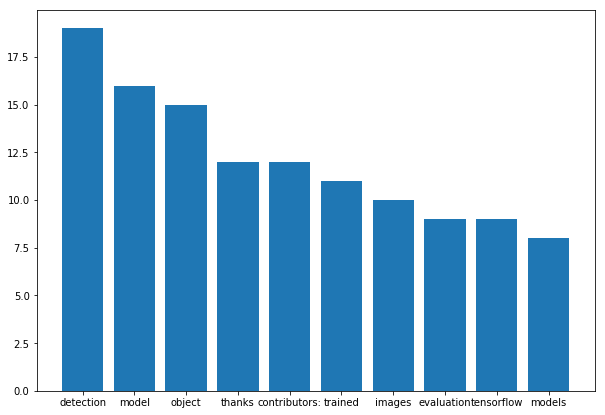

In [106]:
labels, values = zip(*d.items())
# sort your values in descending order
indSort = np.argsort(values)[::-1]
# rearrange your data
labels = np.array(labels)[indSort][:10]
values = np.array(values)[indSort][:10]
indexes = np.arange(len(labels))
plt.figure(figsize=(10,7))
plt.bar(indexes, values)
# add labels
plt.xticks(indexes, labels)
plt.show()

In [136]:
#2 Matrix Multiplication
A=np.random.randint(100, size=(100, 20))
mu, sigma = 2, 0.01 # mean and standard deviation
v = np.random.normal(mu, sigma, 20)
c = np.zeros(A.shape[0])
for i,row in enumerate(A) :
    #print(i)
    c[i] = np.dot(v,row)
print("The new vector c is ",c)
print("The mean of the vector c is" ,np.mean(c))
print("The std deviation of the vector c is" ,np.std(c))

The new vector c is  [2263.63948123 2134.81375201 1866.15824661 1678.03251407 1974.33761921
 1804.83185072 1864.42817328 2290.55063297 2478.07487632 1602.98512219
 1668.50138487 1746.10925185 2007.56867433 1979.63880886 2054.75647506
 1899.07544071 2119.72278532 2236.63487589 1834.87917521 2084.3471475
 1646.78986894 2237.28159181 2206.06810403 1633.29657612 1573.13473236
 1326.17877225 1810.85926555 2016.59453646 2521.19670627 1829.08043346
 1825.07352729 2160.68414018 2013.26105875 1848.76541564 2251.29350536
 2259.58276933 2172.56363231 2061.72836831 2210.69479037 1883.64659169
 2185.51847054 2184.53583143 2264.75226422 1586.95801198 2280.13184166
 2517.16628636 1873.79656146 2069.79169795 1966.86170459 1924.82038447
 1955.66467125 1609.85532297 1919.29349075 1632.62365902 1952.94349316
 1638.65050947 1835.36559507 2002.86032459 2077.65092663 2123.47016594
 1956.74784302 1491.20574826 1954.32081657 2111.65441558 1480.57604705
 1373.82824623 2049.43117944 2419.46967825 1498.92524229 

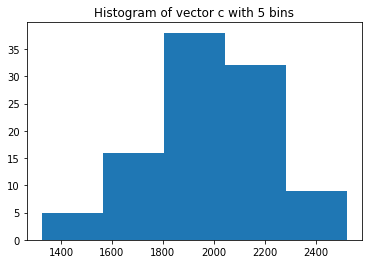

In [137]:
#plotting Histogram
plt.hist(c, bins=5)  
plt.title("Histogram of vector c with 5 bins")
plt.show()

In [228]:
#3 Linear Regression through exact form.
#Creating three sets of data
one=np.random.normal(2, 0.01, (100, 2))
two=np.random.normal(2, 0.1, (100, 2))
three=np.random.normal(2, 1, (100, 2))
#print(one)
#print(two)
#print(three)
def mean(values):
    return sum(values) / float(len(values))
# Calculate covariance between x and y
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x) * (y[i] - mean_y)
    return covar
# Calculate the variance of a list of numbers
def variance(values, mean):
    return sum([(x-mean)**2 for x in values])
# Calculate coefficients
def LEARNSIMPLELINREG(x,y):
    x_mean, y_mean = mean(x), mean(y)
    b1 = covariance(x, x_mean, y, y_mean) / variance(x, x_mean)
    b0 = y_mean - b1 * x_mean
    return [b0, b1]
# Calculate predictions
def PREDICTSIMPLELINREG(x, y, b):     
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
    return y_pred 
# plotting
def regression_lineb0_0(x, y, b):     
    # predicted response vector 
    c=np.ones(y.size)
    y_pred = b[0] *c
    return y_pred
def regression_lineb1_0(x, y, b):     
    # predicted response vector 
    y_pred = b[1]*x 
    return y_pred 
def plott(x, y, y_pred,title):
    # plotting the points as per dataset on a graph
    plt.scatter(x, y, color = "m",marker = "o", s = 30) 
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
    # putting labels for x and y axis
    plt.suptitle(title, fontsize=16)
    plt.xlabel('Size') 
    plt.ylabel('Cost')   
    # function to show plotted graph
    plt.show()    
def MSE(y,y_pred):
    return np.mean((y - y_pred)**2)

The intercept and slope when sigma=0.01 is [1.8514653567333181, 0.07557042708625683]
The intercept and slope when sigma=0.1 is [1.8076333604445547, 0.10866941362639547]
The intercept and slope when sigma=1 is [1.9111609027440013, 0.004048891542928851]
The RMSE when sigma=0.01 is 7.783495247125329e-05
The RMSE when sigma=0.1 is 0.00071025305956876
The RMSE when sigma=1 is 0.00678520116701255


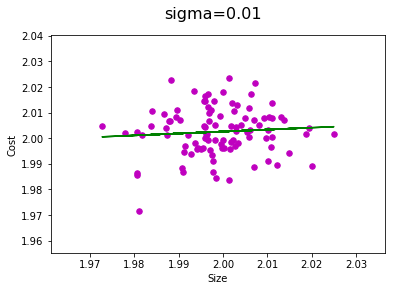

In [229]:
#x,y
x1 = one[:,0]
y1 = one[:,1]
x2 = two[:,0]
y2 = two[:,1]
x3 = three[:,0]
y3 = three[:,1]
#estimating coefficients 
b1 = LEARNSIMPLELINREG(x1, y1) 
b2 = LEARNSIMPLELINREG(x2, y2)
b3 = LEARNSIMPLELINREG(x3, y3)
print("The intercept and slope when sigma=0.01 is", b1)
print("The intercept and slope when sigma=0.1 is", b2)
print("The intercept and slope when sigma=1 is", b3)
 #plotting regression line 
y_pre1=PREDICTSIMPLELINREG(x1, y1, b1)
y_pre2=PREDICTSIMPLELINREG(x2, y2, b2)
y_pre3=PREDICTSIMPLELINREG(x3, y3, b3)
squareerror1 = MSE(y,y_pre1)
squareerror2 = MSE(y,y_pre2)
squareerror3 = MSE(y,y_pre3)
print("The RMSE when sigma=0.01 is" ,squareerror1)
print("The RMSE when sigma=0.1 is",squareerror2)
print("The RMSE when sigma=1 is",squareerror3)
plott(x1, y1, y_pre1,'sigma=0.01')

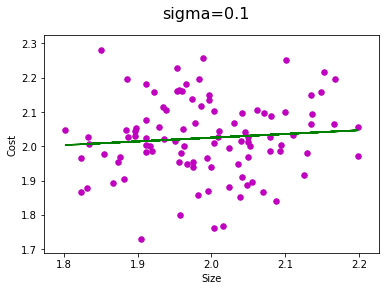

In [230]:
plott(x2, y2, y_pre2,'sigma=0.1')

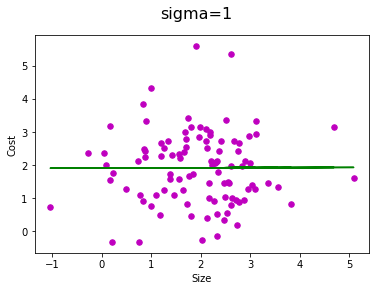

In [231]:
plott(x3, y3, y_pre3,'sigma=1')

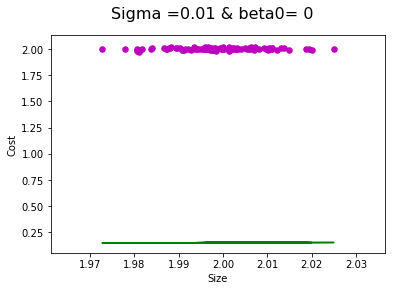

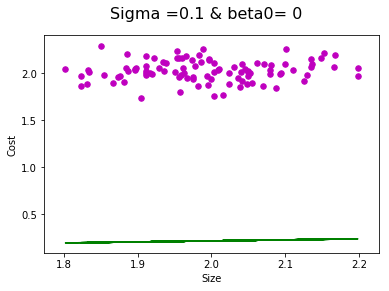

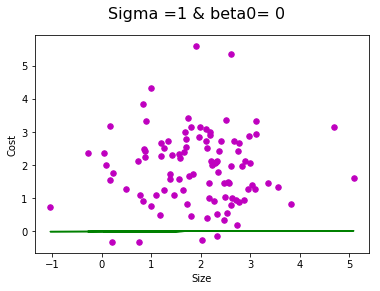

In [232]:
y_pre1=regression_lineb1_0(x1, y1, b1)
y_pre2=regression_lineb1_0(x2, y2, b2)
y_pre3=regression_lineb1_0(x3, y3, b3)
plott(x1, y1, y_pre1,'Sigma =0.01 & beta0= 0')
plott(x2, y2, y_pre2,'Sigma =0.1 & beta0= 0')
plott(x3, y3, y_pre3,'Sigma =1 & beta0= 0')

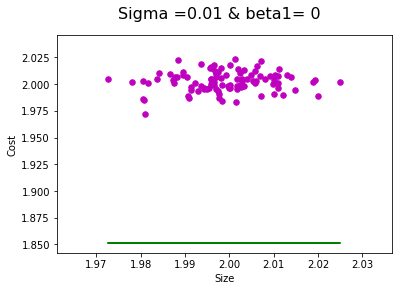

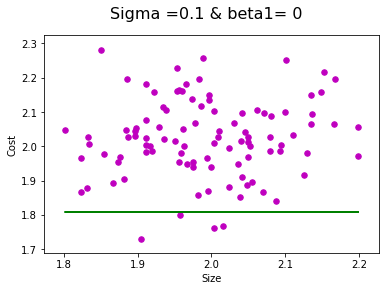

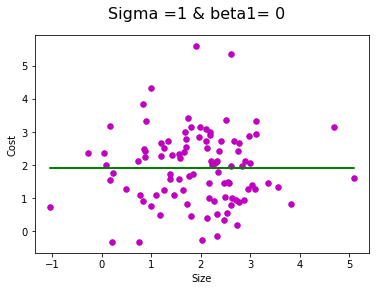

In [233]:
y_pre1=regression_lineb0_0(x1, y1, b1)
y_pre2=regression_lineb0_0(x2, y2, b2)
y_pre3=regression_lineb0_0(x3, y3, b3)
plott(x1, y1, y_pre1,'Sigma =0.01 & beta1= 0')
plott(x2, y2, y_pre2,'Sigma =0.1 & beta1= 0')
plott(x3, y3, y_pre3,'Sigma =1 & beta1= 0')

In [234]:
#Using numpy.linalg buitin function
A1 = np.vstack([x1, np.ones(len(x1))]).T
A2 = np.vstack([x2, np.ones(len(x2))]).T
A3 = np.vstack([x3, np.ones(len(x3))]).T
m1,c1 = np.linalg.lstsq(A1, y1)[0] 
m2,c2 = np.linalg.lstsq(A2, y2)[0]
m3,c3 = np.linalg.lstsq(A3, y3)[0]
print("The intercept and slope when sigma=0.01 is", c1,m1)
print("The intercept and slope when sigma=0.1 is", c2,m2)
print("The intercept and slope when sigma=1 is", c3,m3)

The intercept and slope when sigma=0.01 is 1.8514653567333041 0.07557042708626495
The intercept and slope when sigma=0.1 is 1.8076333604445594 0.10866941362639325
The intercept and slope when sigma=1 is 1.9111609027440029 0.0040488915429286905


C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
C:\Users\HP\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to k